# Banana Harvest Prediction

In [154]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
# read csv
df = pd.read_csv('./dataset/harvest_dataset.csv')

In [156]:
df.head()

,Plant ID,Variety,Agro-climatic region,Plant density,Spacing between plants (m),Plant generation,Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of days for flower initiation,Number of leaves,Number of banana combs,Number of bananas in one comb,Height (m),Yield per plant (kg)
0,1,Cavendish,Wet Zone,4,2.0,2,Organic,6.5,Moderate,Twice a week,275,15,5,150,2.5,40.5
1,2,Williams,Intermediate Zone,3,1.5,3,Chemical,6.8,High,Daily,300,12,4,120,2.0,50.2
2,3,Lady Finger,Dry Zone,1,2.5,1,Organic,6.2,Low,Once a week,285,18,3,90,3.0,35.7
3,4,Robusta,Wet Zone,5,2.0,4,Chemical,6.5,High,Twice a week,280,16,6,180,2.5,60.8
4,5,Gros Michel,Intermediate Zone,2,1.2,1,Organic,6.0,Moderate,Daily,290,14,4,120,2.2,42.3


## 1. Feature Description
---
| Property | Description |
|----------|-------------|
| Plant ID | Unique identifier for each banana plant |
| Variety | The type of banana variety being grown (e.g. Cavendish, Williams, etc.) |
| Agro-climatic region | The region in Sri Lanka where the plant is being grown (Wet Zone, Intermediate Zone, or Dry Zone) |
| Plant density | The number of banana plants per unit area of land |
| Spacing between plants | The distance between adjacent banana plants |
| Plant generation | Whether the plant is a first generation or subsequent generation plant |
| Fertilizer type | The type of fertilizer used (organic or chemical) |
| Soil pH | The pH level of the soil where the plant is being grown |
| Amount of sunlight received | The amount of sunlight the plant receives (low, moderate, or high) |
| Watering schedule | The frequency of watering (daily, twice a week, once a week, or no watering) |
| Number of days for flower initiation | The number of days it takes for the plant to begin producing flowers |
| Number of leaves | The number of leaves on the plant |
| Number of banana combs | The number of combs (clusters) of bananas produced by the plant |
| Number of bananas in one comb | The number of bananas in a single comb |
| Height (in feet) | The height of the plant |
| Yield per plant (kg) | The yield of bananas produced by the plant |

Each row in the dataset would contain the values of these properties for a single banana plant. The yield per plant would be the target variable, which is what we are trying to predict.

In [157]:
df.columns

Index(['Plant ID', 'Variety', 'Agro-climatic region', 'Plant density',
       'Spacing between plants (m)', 'Plant generation', 'Fertilizer type',
       'Soil pH', 'Amount of sunlight received', 'Watering schedule',
       'Number of days for flower initiation', 'Number of leaves',
       'Number of banana combs', 'Number of bananas in one comb', 'Height (m)',
       'Yield per plant (kg)'],
      dtype='object')

## 2. Exploratory Data Analysis(EDA)

In [158]:
# database shape
df.shape

(15, 16)

In [159]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Plant ID                              15 non-null     int64  
 1   Variety                               15 non-null     object 
 2   Agro-climatic region                  15 non-null     object 
 3   Plant density                         15 non-null     int64  
 4   Spacing between plants (m)            15 non-null     float64
 5   Plant generation                      15 non-null     int64  
 6   Fertilizer type                       15 non-null     object 
 7   Soil pH                               15 non-null     float64
 8   Amount of sunlight received           15 non-null     object 
 9   Watering schedule                     15 non-null     object 
 10  Number of days for flower initiation  15 non-null     int64  
 11  Number of leaves     

In [160]:
# is there missing data
df.isnull().any()

Plant ID                                False
Variety                                 False
Agro-climatic region                    False
Plant density                           False
Spacing between plants (m)              False
Plant generation                        False
Fertilizer type                         False
Soil pH                                 False
Amount of sunlight received             False
Watering schedule                       False
Number of days for flower initiation    False
Number of leaves                        False
Number of banana combs                  False
Number of bananas in one comb           False
Height (m)                              False
Yield per plant (kg)                     True
dtype: bool

<AxesSubplot:>

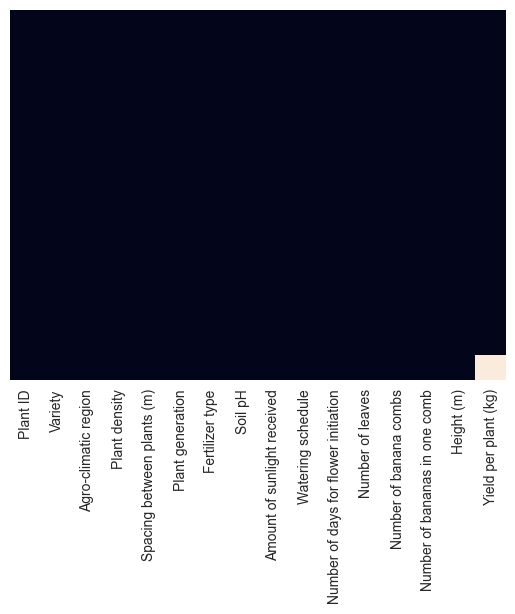

In [161]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

> Seems `Yield per plant(kg)` have missing values

In [162]:
# drop that row
df = df.dropna(axis=0)

In [163]:
# what are the null rows
null_yields = df[df['Yield per plant (kg)'].isnull()]
null_yields.head()

,Plant ID,Variety,Agro-climatic region,Plant density,Spacing between plants (m),Plant generation,Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of days for flower initiation,Number of leaves,Number of banana combs,Number of bananas in one comb,Height (m),Yield per plant (kg)


In [164]:
# summary of statistics
df.describe()

,Plant ID,Plant density,Spacing between plants (m),Plant generation,Soil pH,Number of days for flower initiation,Number of leaves,Number of banana combs,Number of bananas in one comb,Height (m),Yield per plant (kg)
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,7.5000,3.071429,1.921429,2.357143,6.492857,284.642857,15.928571,4.357143,130.714286,2.528571,49.650000
std,4.1833,1.268814,0.475845,1.081818,0.294734,11.000749,2.758603,1.008208,30.246242,0.385164,8.420465
min,1.0000,1.000000,1.200000,1.000000,6.000000,265.000000,12.000000,3.000000,90.000000,2.000000,35.700000
25%,4.2500,2.250000,1.500000,1.250000,6.275000,276.250000,14.000000,4.000000,120.000000,2.200000,42.675000
50%,7.5000,3.000000,2.000000,2.500000,6.500000,285.000000,15.500000,4.000000,120.000000,2.500000,49.550000
75%,10.7500,4.000000,2.375000,3.000000,6.800000,293.750000,17.750000,5.000000,150.000000,2.800000,55.525000
max,14.0000,5.000000,2.500000,4.000000,6.800000,300.000000,21.000000,6.000000,180.000000,3.200000,63.200000


##### What are the varieties available?

In [165]:
df['Variety'].unique()

array(['Cavendish', 'Williams', 'Lady Finger', 'Robusta', 'Gros Michel',
       'Dwarf Cavendish'], dtype=object)

Text(0.5, 1.0, 'Distribution of Varieties')

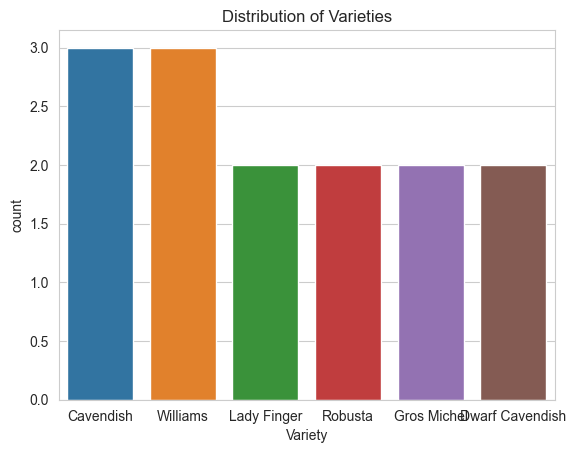

In [166]:
sns.countplot(x='Variety', data=df)
# add a title to the plot
plt.title('Distribution of Varieties')

> `Robusta`, `Gros Michewarf`, `Cavendish` have lesser records compared to other varieties

In [167]:
df['Agro-climatic region'].unique()

array(['Wet Zone', 'Intermediate Zone', 'Dry Zone'], dtype=object)

Text(0.5, 1.0, 'Agro-climatic region')

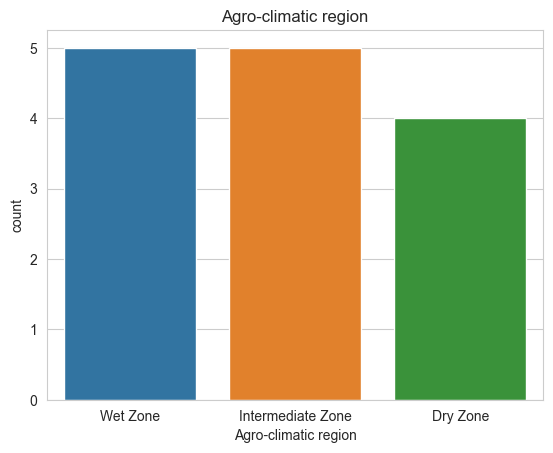

In [168]:
sns.countplot(x='Agro-climatic region', data=df)
# add a title to the plot
plt.title('Agro-climatic region')

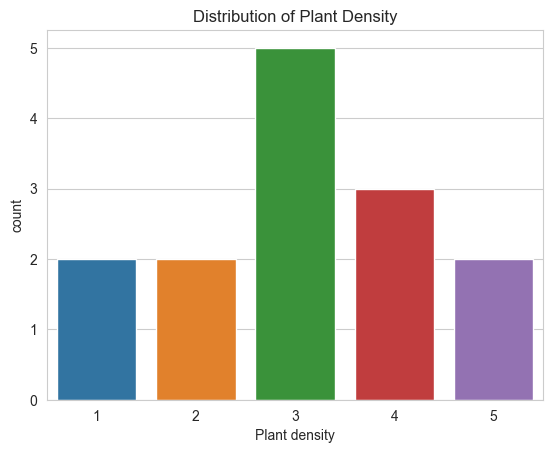

In [169]:
sns.set_style('whitegrid')
sns.countplot(x='Plant density', data=df)
plt.title('Distribution of Plant Density')
plt.show()

> - Plant density 3 is the most common plant density in the dataset
> - Plant density 2 and 5 is the least common plant density in the dataset

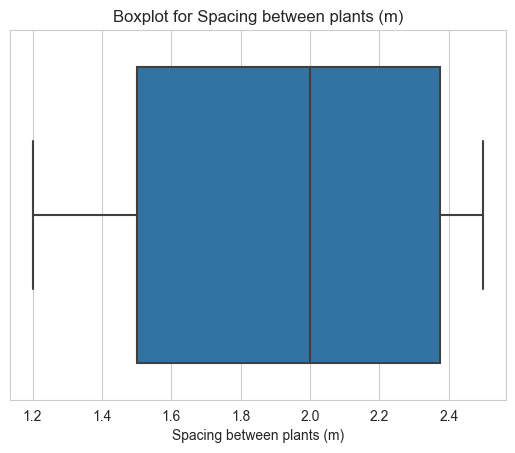

In [170]:
# Create a boxplot
sns.boxplot(x="Spacing between plants (m)", data=df)
plt.title("Boxplot for Spacing between plants (m)")
plt.show()

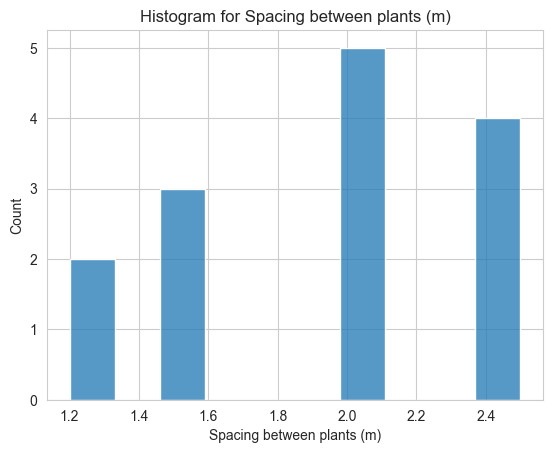

In [171]:
# Create a histogram
sns.histplot(x="Spacing between plants (m)", data=df, bins=10)
plt.title("Histogram for Spacing between plants (m)")
plt.show()

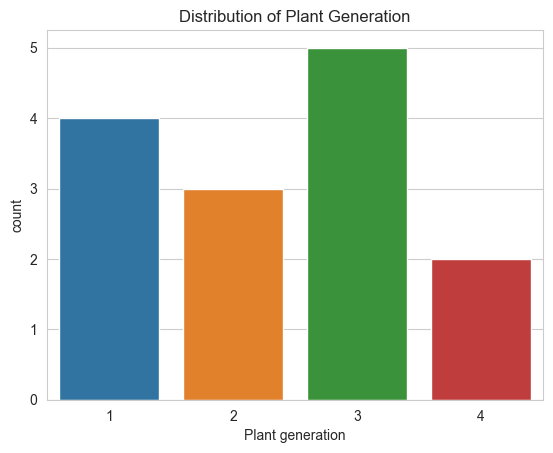

In [172]:
sns.countplot(x='Plant generation', data=df)
plt.title('Distribution of Plant Generation')
plt.show()

Text(0.5, 1.0, 'Distribution of Fertilizer Type')

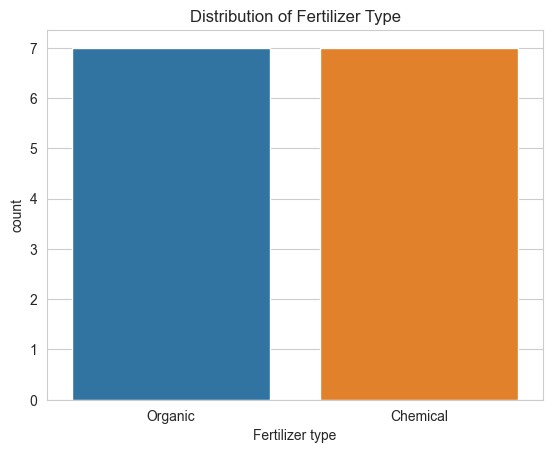

In [173]:
sns.countplot(x='Fertilizer type', data=df)
# add a title to the plot
plt.title('Distribution of Fertilizer Type')

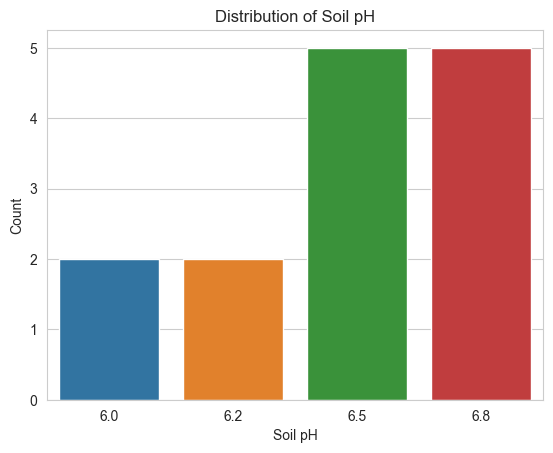

In [174]:
sns.countplot(x='Soil pH', data=df)
plt.title('Distribution of Soil pH')
plt.xlabel('Soil pH')
plt.ylabel('Count')
plt.show()

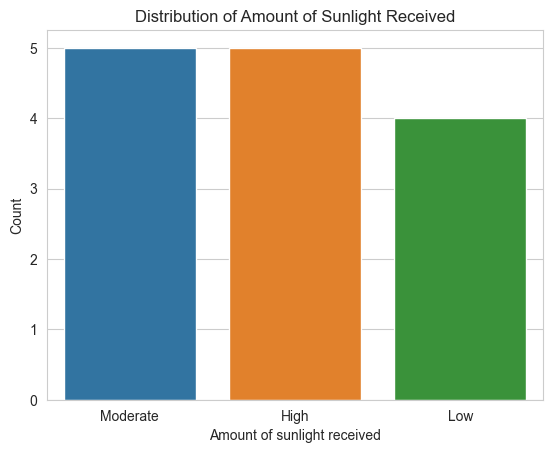

In [175]:
sns.countplot(x='Amount of sunlight received', data=df)
plt.title('Distribution of Amount of Sunlight Received')
plt.xlabel('Amount of sunlight received')
plt.ylabel('Count')
plt.show()

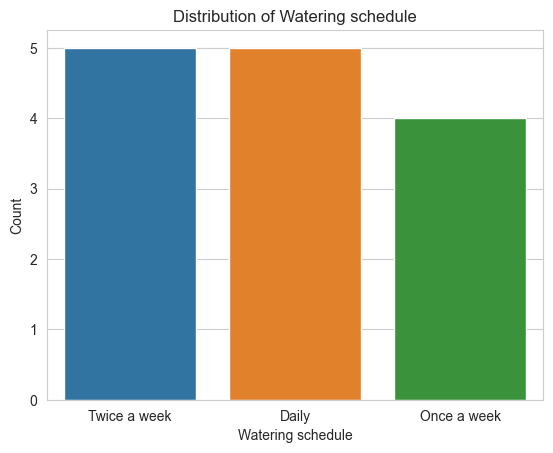

In [176]:
sns.countplot(x='Watering schedule', data=df)
plt.title('Distribution of Watering schedule')
plt.xlabel('Watering schedule')
plt.ylabel('Count')
plt.show()

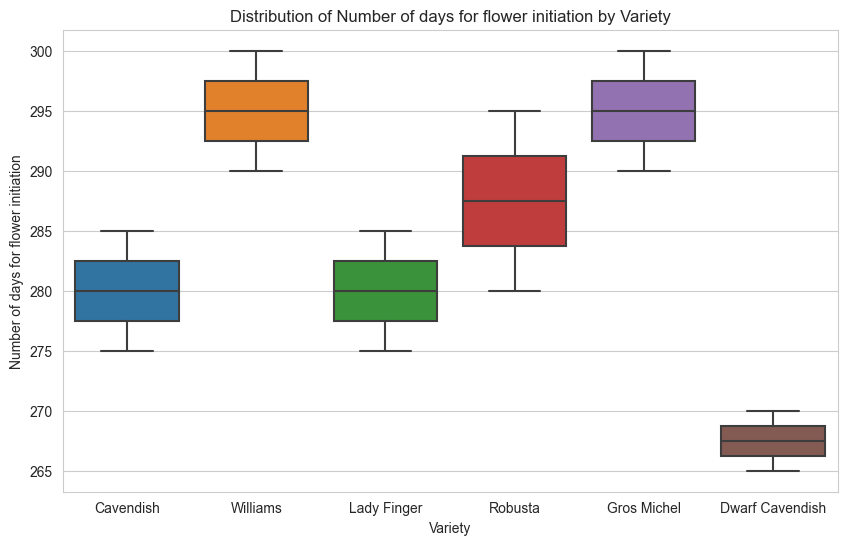

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


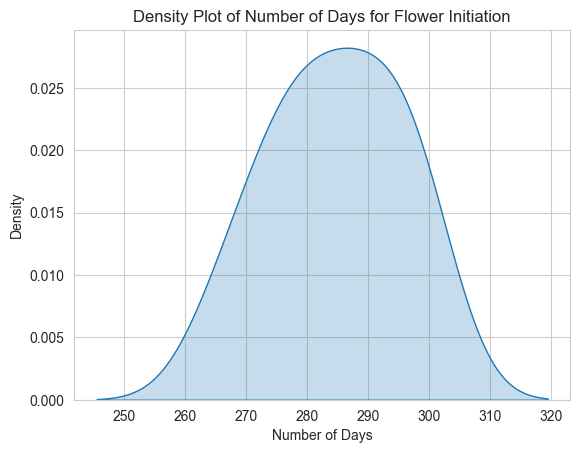

In [177]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Variety', y='Number of days for flower initiation')
plt.title('Distribution of Number of days for flower initiation by Variety')
plt.show()

sns.kdeplot(df['Number of days for flower initiation'], shade=True)
plt.title('Density Plot of Number of Days for Flower Initiation')
plt.xlabel('Number of Days')
plt.ylabel('Density')
plt.show()

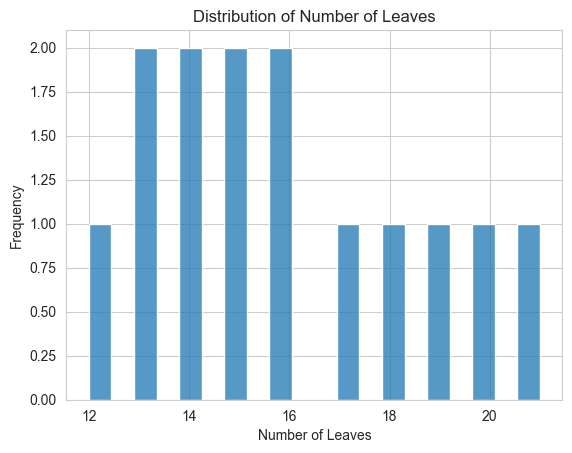

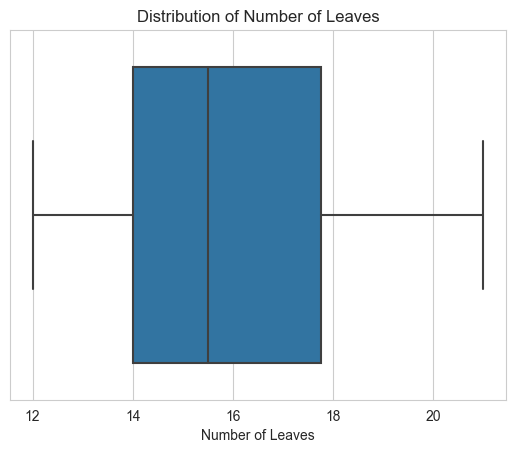

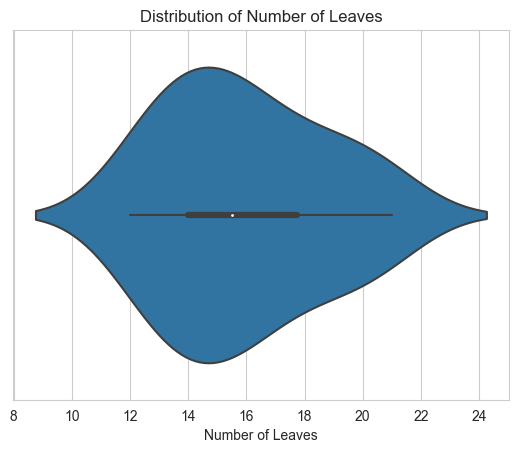

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  app.launch_new_instance()


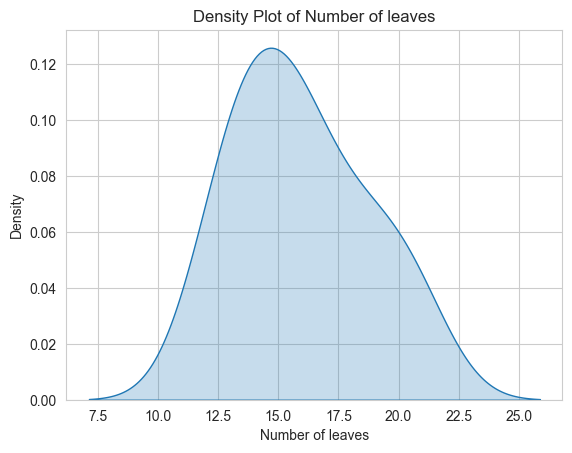

In [178]:
sns.histplot(df['Number of leaves'], bins=20)
plt.title('Distribution of Number of Leaves')
plt.xlabel('Number of Leaves')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['Number of leaves'])
plt.title('Distribution of Number of Leaves')
plt.xlabel('Number of Leaves')
plt.show()

sns.violinplot(x=df['Number of leaves'])
plt.title('Distribution of Number of Leaves')
plt.xlabel('Number of Leaves')
plt.show()

sns.kdeplot(df['Number of leaves'], shade=True)
plt.title('Density Plot of Number of leaves')
plt.xlabel('Number of leaves')
plt.ylabel('Density')
plt.show()

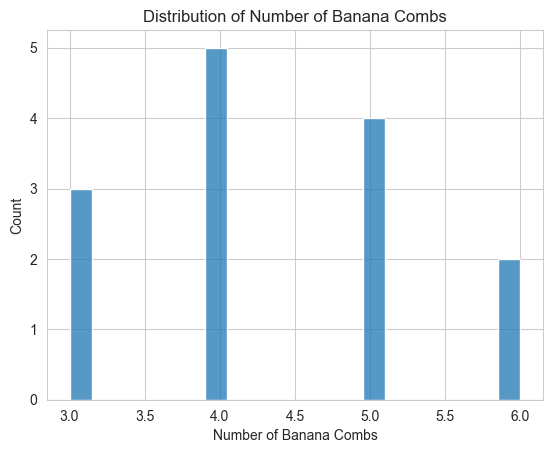

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


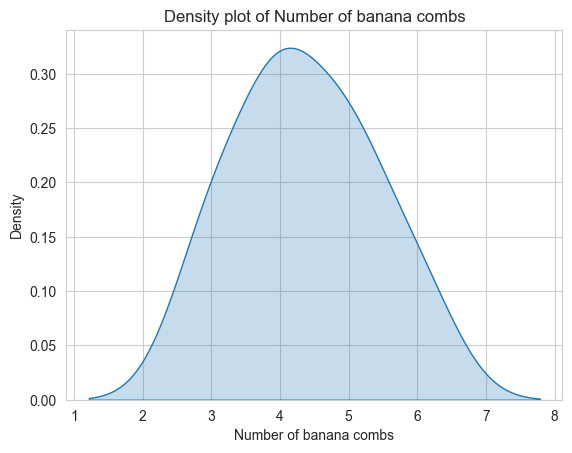

In [179]:
# Plot for 'Number of banana combs'
sns.histplot(df['Number of banana combs'], bins=20, kde=False)
plt.title('Distribution of Number of Banana Combs')
plt.xlabel('Number of Banana Combs')
plt.ylabel('Count')
plt.show()

sns.kdeplot(df['Number of banana combs'], shade=True)
plt.title('Density plot of Number of banana combs')
plt.show()

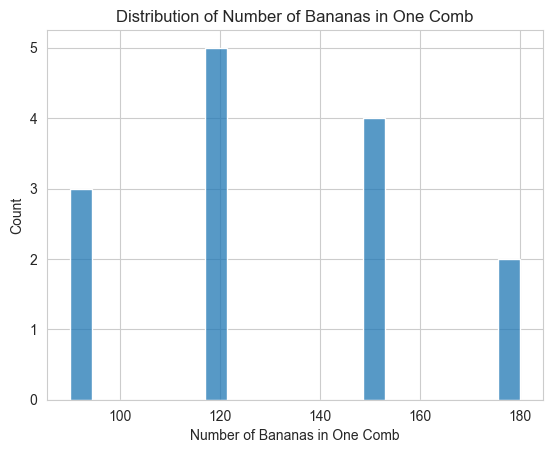

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


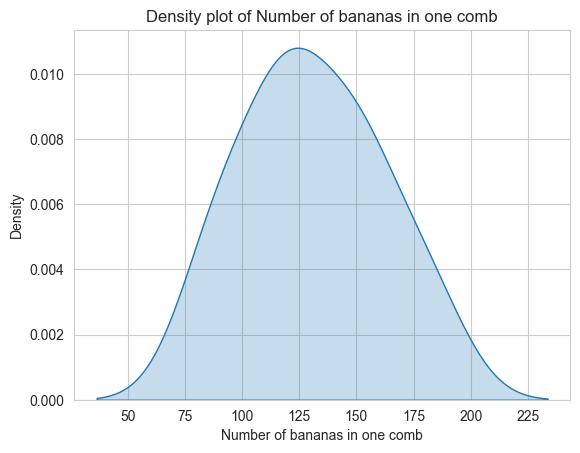

In [180]:
# Plot for 'Number of bananas in one comb'
sns.histplot(df['Number of bananas in one comb'], bins=20, kde=False)
plt.title('Distribution of Number of Bananas in One Comb')
plt.xlabel('Number of Bananas in One Comb')
plt.ylabel('Count')
plt.show()

sns.kdeplot(df['Number of bananas in one comb'], shade=True)
plt.title('Density plot of Number of bananas in one comb')
plt.show()

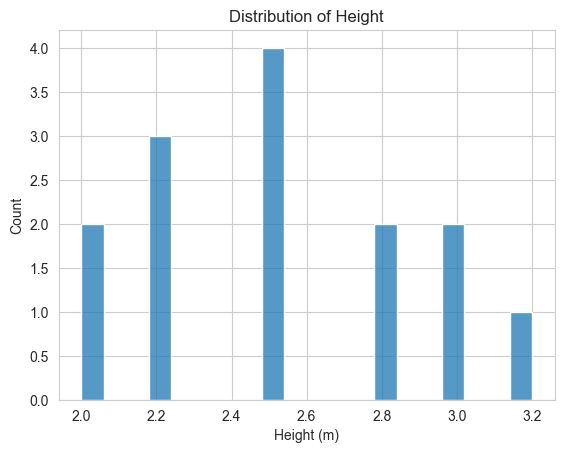

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


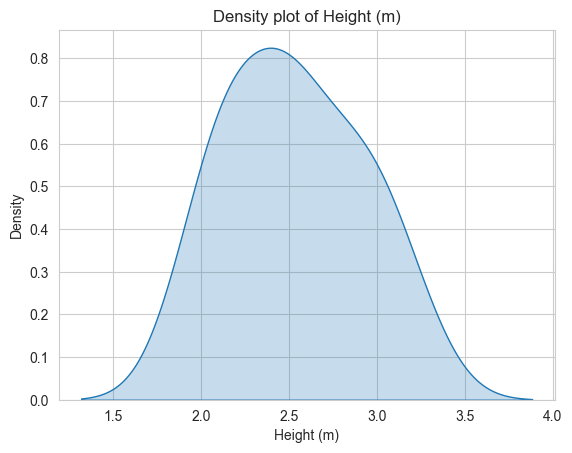

In [181]:
# Plot for 'Height (m)'
sns.histplot(df['Height (m)'], bins=20, kde=False)
plt.title('Distribution of Height')
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.show()

sns.kdeplot(df['Height (m)'], shade=True)
plt.title('Density plot of Height (m)')
plt.show()

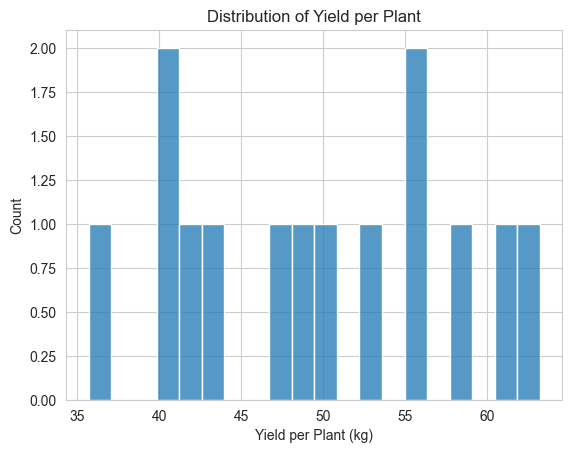

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


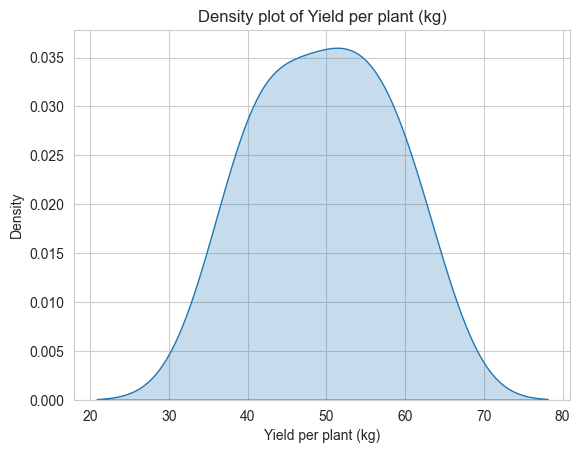

In [182]:
# Plot for 'Yield per plant (kg)'
sns.histplot(df['Yield per plant (kg)'], bins=20, kde=False)
plt.title('Distribution of Yield per Plant')
plt.xlabel('Yield per Plant (kg)')
plt.ylabel('Count')
plt.show()

sns.kdeplot(df['Yield per plant (kg)'], shade=True)
plt.title('Density plot of Yield per plant (kg)')
plt.show()

#### Relationship between features

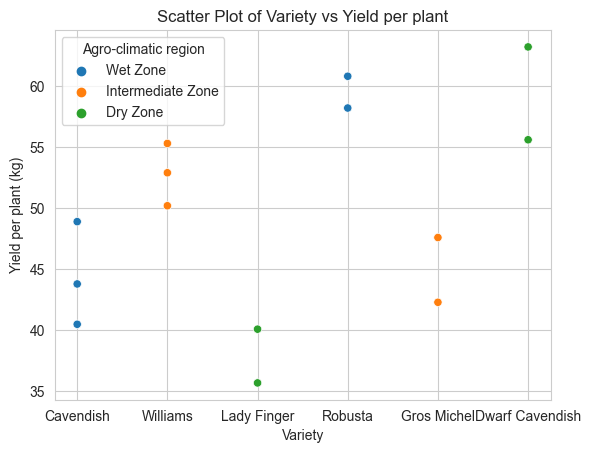

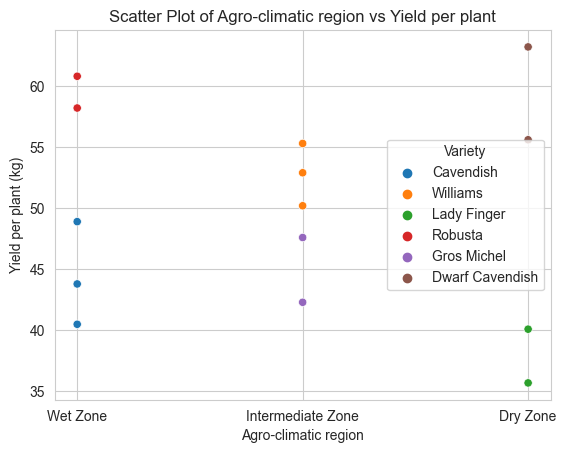

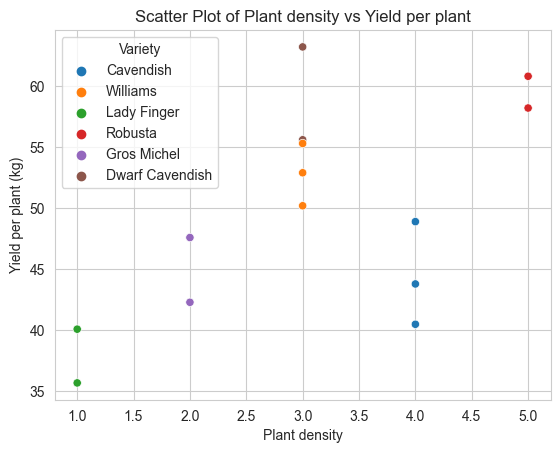

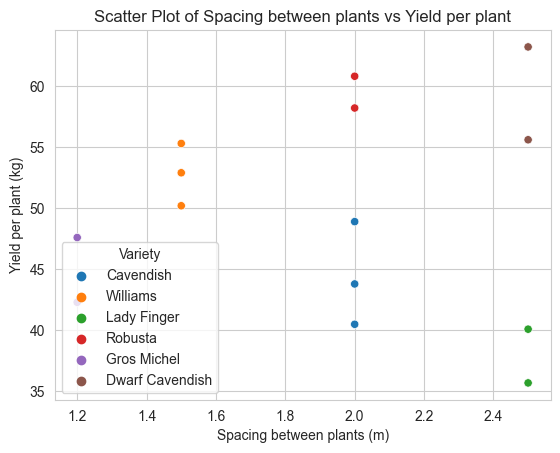

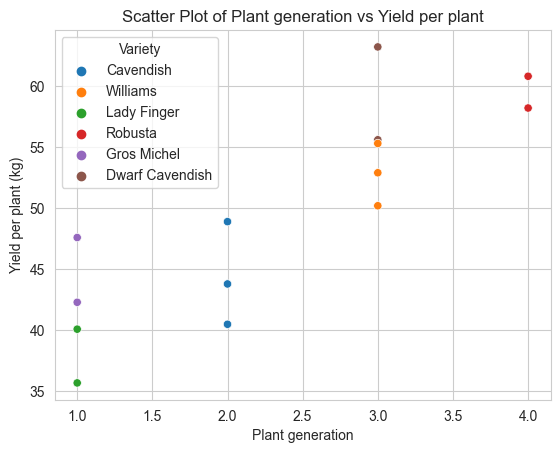

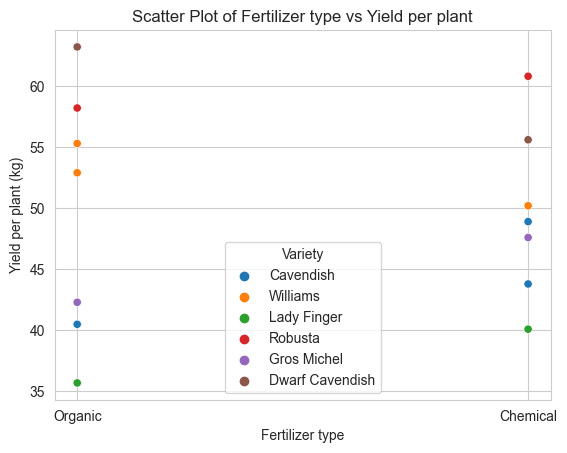

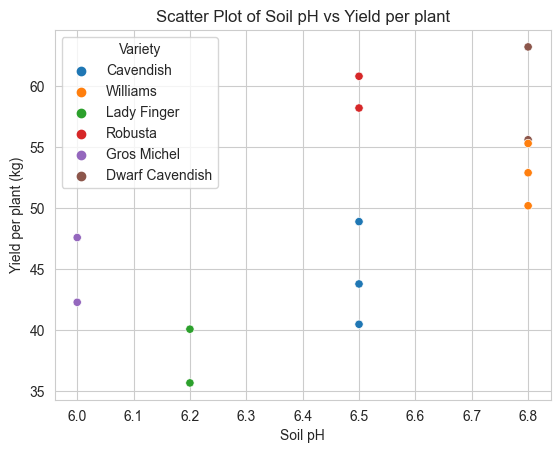

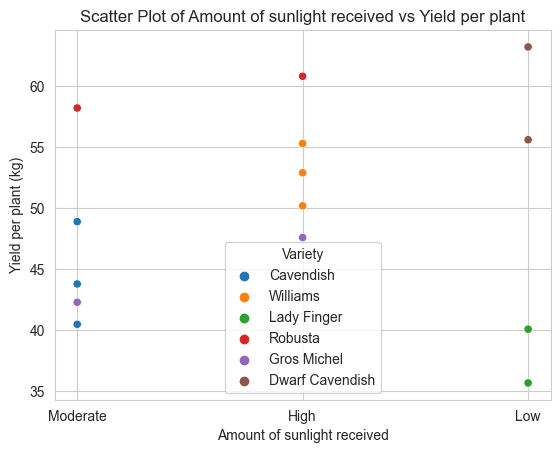

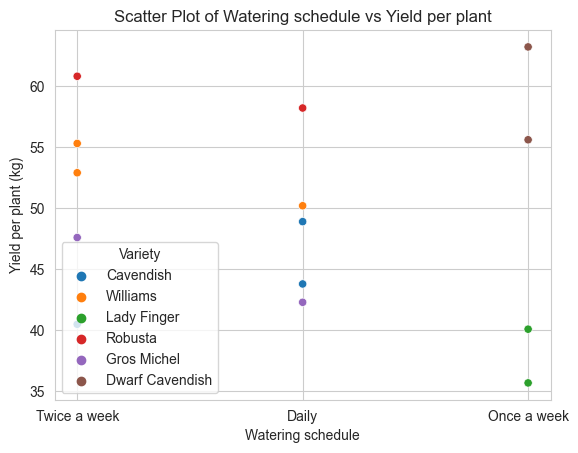

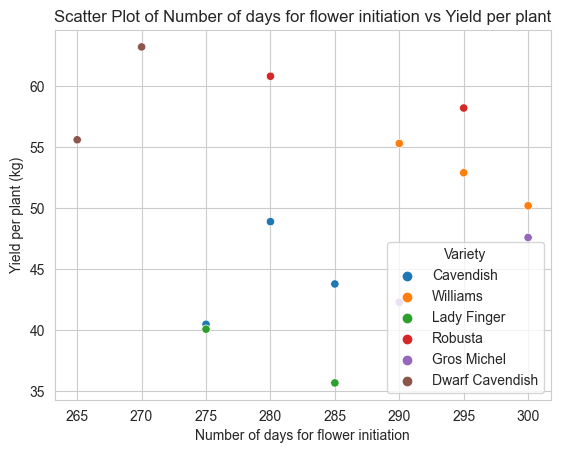

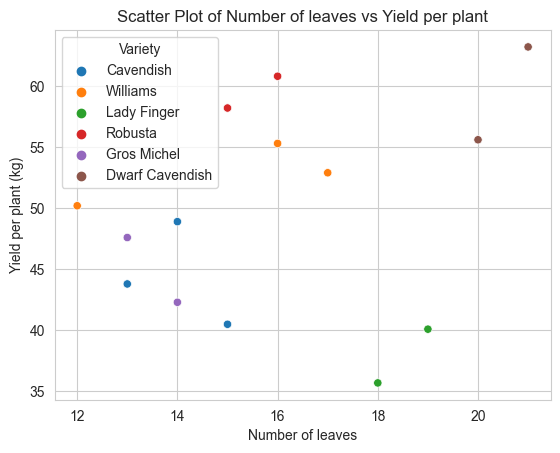

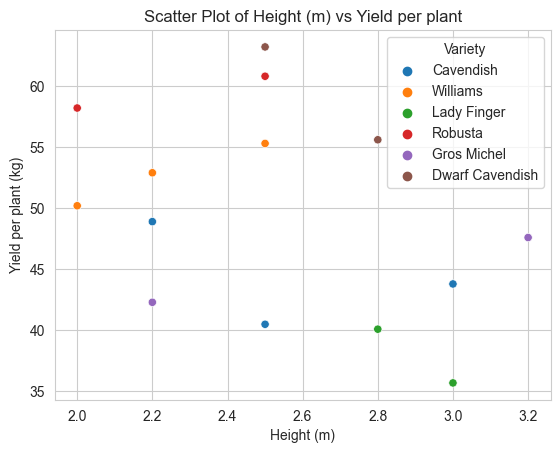

In [183]:
# Scatter plot for 'Variety' vs 'Yield per plant'
sns.scatterplot(x='Variety', y='Yield per plant (kg)', hue='Agro-climatic region', data=df)
plt.title('Scatter Plot of Variety vs Yield per plant')
plt.show()

# Scatter plot for 'Agro-climatic region' vs 'Yield per plant'
sns.scatterplot(x='Agro-climatic region', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Agro-climatic region vs Yield per plant')
plt.show()

# Scatter plot for 'Plant density' vs 'Yield per plant'
sns.scatterplot(x='Plant density', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Plant density vs Yield per plant')
plt.show()

# Scatter plot for 'Spacing between plants (m)' vs 'Yield per plant'
sns.scatterplot(x='Spacing between plants (m)', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Spacing between plants vs Yield per plant')
plt.show()

# Scatter plot for 'Plant generation' vs 'Yield per plant'
sns.scatterplot(x='Plant generation', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Plant generation vs Yield per plant')
plt.show()

# Scatter plot for 'Fertilizer type' vs 'Yield per plant'
sns.scatterplot(x='Fertilizer type', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Fertilizer type vs Yield per plant')
plt.show()

# Scatter plot for 'Soil pH' vs 'Yield per plant'
sns.scatterplot(x='Soil pH', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Soil pH vs Yield per plant')
plt.show()

# Scatter plot for 'Amount of sunlight received' vs 'Yield per plant'
sns.scatterplot(x='Amount of sunlight received', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Amount of sunlight received vs Yield per plant')
plt.show()

# Scatter plot for 'Watering schedule' vs 'Yield per plant'
sns.scatterplot(x='Watering schedule', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Watering schedule vs Yield per plant')
plt.show()

# Scatter plot for 'Number of days for flower initiation' vs 'Yield per plant'
sns.scatterplot(x='Number of days for flower initiation', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Number of days for flower initiation vs Yield per plant')
plt.show()

# Scatter plot for 'Number of leaves' vs 'Yield per plant'
sns.scatterplot(x='Number of leaves', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Number of leaves vs Yield per plant')
plt.show()

# Scatter plot for 'Height (m)' vs 'Yield per plant'
sns.scatterplot(x='Height (m)', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Height (m) vs Yield per plant')
plt.show()

In [184]:
max_value = df['Yield per plant (kg)'].max()
upper_bound = math.ceil(max_value / 5) * 5

bin_edges = [i for i in range(0, upper_bound+5, 5)]
# create bin labels dynamically
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]-1} kg" for i in range(len(bin_edges)-1)]
print(f'Max Value: {max_value}')
print(f'Bins:{bin_labels}')
      # Use the pd.cut() function to create a new column with the range labels
df['Yield per plant range'] = pd.cut(df['Yield per plant (kg)'], bins=bin_edges, labels=bin_labels)
df.head(50)

Max Value: 63.2
Bins:['0-4 kg', '5-9 kg', '10-14 kg', '15-19 kg', '20-24 kg', '25-29 kg', '30-34 kg', '35-39 kg', '40-44 kg', '45-49 kg', '50-54 kg', '55-59 kg', '60-64 kg']


,Plant ID,Variety,Agro-climatic region,Plant density,Spacing between plants (m),Plant generation,Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of days for flower initiation,Number of leaves,Number of banana combs,Number of bananas in one comb,Height (m),Yield per plant (kg),Yield per plant range
0,1,Cavendish,Wet Zone,4,2.0,2,Organic,6.5,Moderate,Twice a week,275,15,5,150,2.5,40.5,40-44 kg
1,2,Williams,Intermediate Zone,3,1.5,3,Chemical,6.8,High,Daily,300,12,4,120,2.0,50.2,50-54 kg
2,3,Lady Finger,Dry Zone,1,2.5,1,Organic,6.2,Low,Once a week,285,18,3,90,3.0,35.7,35-39 kg
3,4,Robusta,Wet Zone,5,2.0,4,Chemical,6.5,High,Twice a week,280,16,6,180,2.5,60.8,60-64 kg
4,5,Gros Michel,Intermediate Zone,2,1.2,1,Organic,6.0,Moderate,Daily,290,14,4,120,2.2,42.3,40-44 kg
5,6,Dwarf Cavendish,Dry Zone,3,2.5,3,Chemical,6.8,Low,Once a week,265,20,5,150,2.8,55.6,55-59 kg
6,7,Cavendish,Wet Zone,4,2.0,2,Chemical,6.5,Moderate,Daily,280,14,4,120,2.2,48.9,45-49 kg
7,8,Williams,Intermediate Zone,3,1.5,3,Organic,6.8,High,Twice a week,290,16,5,150,2.5,55.3,55-59 kg
8,9,Lady Finger,Dry Zone,1,2.5,1,Chemical,6.2,Low,Once a week,275,19,4,120,2.8,40.1,40-44 kg
9,10,Robusta,Wet Zone,5,2.0,4,Organic,6.5,Moderate,Daily,295,15,6,180,2.0,58.2,55-59 kg


<AxesSubplot:ylabel='Yield per plant range'>

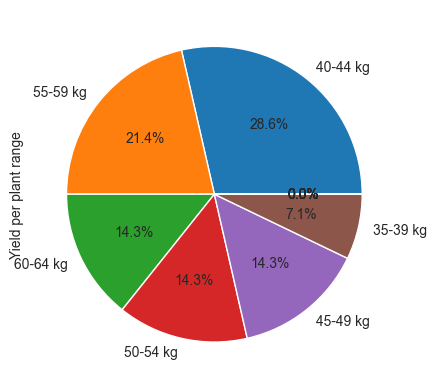

In [185]:
# Count the number of data points in each range
range_counts = df['Yield per plant range'].value_counts()

# Plot a pie chart of the range proportions
range_counts.plot.pie(autopct='%1.1f%%', labels=range_counts.index)

## 3. Correlation Matrix

<AxesSubplot:>

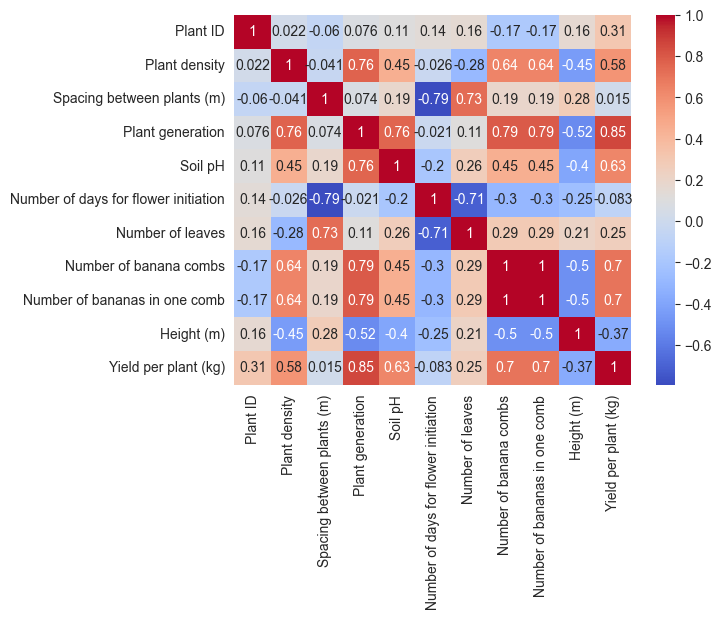

In [186]:
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

> No highly correlated features(considered threshold = 0.9)

## 3. Data Pre Processing

In [187]:
# drop plant id column
df.drop(['Plant ID', 'Yield per plant (kg)'], axis=1, inplace=True)
df.head(50)

,Variety,Agro-climatic region,Plant density,Spacing between plants (m),Plant generation,Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of days for flower initiation,Number of leaves,Number of banana combs,Number of bananas in one comb,Height (m),Yield per plant range
0,Cavendish,Wet Zone,4,2.0,2,Organic,6.5,Moderate,Twice a week,275,15,5,150,2.5,40-44 kg
1,Williams,Intermediate Zone,3,1.5,3,Chemical,6.8,High,Daily,300,12,4,120,2.0,50-54 kg
2,Lady Finger,Dry Zone,1,2.5,1,Organic,6.2,Low,Once a week,285,18,3,90,3.0,35-39 kg
3,Robusta,Wet Zone,5,2.0,4,Chemical,6.5,High,Twice a week,280,16,6,180,2.5,60-64 kg
4,Gros Michel,Intermediate Zone,2,1.2,1,Organic,6.0,Moderate,Daily,290,14,4,120,2.2,40-44 kg
5,Dwarf Cavendish,Dry Zone,3,2.5,3,Chemical,6.8,Low,Once a week,265,20,5,150,2.8,55-59 kg
6,Cavendish,Wet Zone,4,2.0,2,Chemical,6.5,Moderate,Daily,280,14,4,120,2.2,45-49 kg
7,Williams,Intermediate Zone,3,1.5,3,Organic,6.8,High,Twice a week,290,16,5,150,2.5,55-59 kg
8,Lady Finger,Dry Zone,1,2.5,1,Chemical,6.2,Low,Once a week,275,19,4,120,2.8,40-44 kg
9,Robusta,Wet Zone,5,2.0,4,Organic,6.5,Moderate,Daily,295,15,6,180,2.0,55-59 kg


#### Split dataset into independant and dependant variables

In [188]:
X = df.drop('Yield per plant range', axis=1)
y = df['Yield per plant range']

## 4. Data Encoding

#### OneHot encode
>One-hot encoding is a technique used to convert categorical data into numerical data.
> In machine learning, we often encounter datasets that contain categorical features
> such as colors, cities, or types of products. These categorical features can't be
 > used directly in most machine learning models because they require numerical data.
>
>One-hot encoding solves this problem by converting categorical features into binary
> vectors. Each category is assigned a unique binary vector, with a 1 in the position
> corresponding to that category, and 0s elsewhere.
> >For example,
> >if we have three categories `A`, `B`, and `C`, then
> >
> > `A=[1, 0, 0]`, `B=[0, 1, 0]`, and `C=[0, 0, 1]`.
>
> By using one-hot encoding, we can transform categorical data into numerical data
> that can be used in machine learning models. One-hot encoding helps models to
> capture non-linear relationships between categorical features and the target
> variable. It also prevents the model from assigning ordinality to the categories,
> which could introduce bias in the analysis.
>
> In summary, one-hot encoding is a technique used to transform categorical data
> into binary vectors, making it suitable for use in machine learning models.


 Following columns are OneHot Encoded`Variety`, `Agro-climatic region`, `Fertilizer type`

In [189]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pickle

# One-hot encode categorical columns
ohe_cols = ['Variety', 'Agro-climatic region', 'Fertilizer type']
ohe = OneHotEncoder(sparse=False, drop='first')
ohe_data = ohe.fit_transform(df[ohe_cols])

# Save the encoder object using pickle
with open('harvest_data_one_hot_encoded.pkl', 'wb') as f:
    pickle.dump(ohe, f)

# Print the encoded labels and their corresponding arrays
encoded_labels = ohe.get_feature_names_out(ohe_cols)
encoded_dict = {}
for i, label in enumerate(encoded_labels):
    encoded_dict[label] = ohe_data[:, i].tolist()
print(encoded_dict)

{'Variety_Dwarf Cavendish': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 'Variety_Gros Michel': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'Variety_Lady Finger': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Variety_Robusta': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Variety_Williams': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'Agro-climatic region_Intermediate Zone': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0], 'Agro-climatic region_Wet Zone': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0], 'Fertilizer type_Organic': [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]}


#### Ordinal Encode
>Ordinal encoding is a technique used to convert categorical variables
(variables with limited and fixed set of possible values) into numerical variables.
 It assigns a unique numerical value to each category, based on their alphabetical
> order or their frequency of occurrence.
> > For example,
> > if we have a categorical variable called `"Fruit"` with categories
> >`"Apple", "Banana"`, and `"Orange"`,
> > label encoding would assign the values `0, 1,` and `2` respectively.
>
> This helps in making categorical variables usable for machine learning algorithms,
> as most algorithms require numerical data as input. However, it is important to
> note that ordinal encoding is not always appropriate for all categorical variables
> and can sometimes lead to incorrect or biased results.

In [190]:

oe_cols = ['Amount of sunlight received', 'Watering schedule']
oe = OrdinalEncoder(categories=[['Low', 'Moderate', 'High'], ['Once a week', 'Twice a week', 'Daily']])
oe_data = oe.fit_transform(df[oe_cols])

# Save the encoder object using pickle
with open('harvest_data_ordinal_encoded.pkl', 'wb') as f:
    pickle.dump(oe, f)

# Create a dictionary with column names as keys and encoded values as values
oe_dict = {}
for i, col in enumerate(oe_cols):
    oe_dict[col] = dict(zip(df[col], oe_data[:,i]))

# Print the dictionary
print(oe_dict)

{'Amount of sunlight received': {'Moderate': 1.0, 'High': 2.0, 'Low': 0.0}, 'Watering schedule': {'Twice a week': 1.0, 'Daily': 2.0, 'Once a week': 0.0}}


In [191]:
# Combine one-hot encoded and ordinal encoded data
x = np.hstack([ohe_data, oe_data])
x

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 0., 0., 2., 2.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 2., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 1., 2.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 2.],
       [0., 0., 0., 0., 1., 1., 0., 1., 2., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 1., 1., 2.],
       [0., 1., 0., 0., 0., 1., 0., 0., 2., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 2.],
       [0., 0., 0., 0., 1., 1., 0., 1., 2., 1.]])

#### Encoding y

In [192]:
# y column
df[['Yield per plant range']]

,Yield per plant range
0,40-44 kg
1,50-54 kg
2,35-39 kg
3,60-64 kg
4,40-44 kg
5,55-59 kg
6,45-49 kg
7,55-59 kg
8,40-44 kg
9,55-59 kg


In [193]:
# Extract the unique categories in y
y_categories = sorted(list(y.dropna().unique()))
print(y_categories)

['35-39 kg', '40-44 kg', '45-49 kg', '50-54 kg', '55-59 kg', '60-64 kg']


In [194]:
# Initialize the OrdinalEncoder object
oe_y = OrdinalEncoder(categories=[y_categories])
# Fit and transform y
y_data = oe_y.fit_transform(df[['Yield per plant range']])

# Save the encoder object using pickle
with open('y_data_ordinal_encoded.pkl', 'wb') as f:
    pickle.dump(oe_y, f)

# Create the dictionary
oe_y_dict = {}
for i, category in enumerate(oe_y.categories_[0]):
    oe_y_dict[category] = int(i)

# Print the dictionary
print(oe_y_dict)

{'35-39 kg': 0, '40-44 kg': 1, '45-49 kg': 2, '50-54 kg': 3, '55-59 kg': 4, '60-64 kg': 5}


#### Test and Train Split

In [195]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_data, test_size=0.2, random_state=42)

#### Standardize Data

In [196]:
from sklearn.preprocessing import StandardScaler

# Scale the training features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

with open('harvest_data_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [197]:
# Scale the testing features using the same scaler object
x_test = scaler.transform(x_test)

## 5. Model Training and Evaluation

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [199]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(x_train, y_train.ravel())
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        'F1 score': f1,
        'Recall': recall,
        'Precision': precision,
        'Accuracy': accuracy,
        'Confusion Matrix': cm
    }

Logistic Regression:
----------------------------------
F1 score: 0.3333333333333333
Recall: 0.3333333333333333
Precision: 0.3333333333333333
Accuracy: 0.3333333333333333

Decision Tree:
----------------------------------
F1 score: 0.3333333333333333
Recall: 0.3333333333333333
Precision: 0.3333333333333333
Accuracy: 0.3333333333333333

Random Forest:
----------------------------------
F1 score: 0.2222222222222222
Recall: 0.3333333333333333
Precision: 0.16666666666666666
Accuracy: 0.3333333333333333

SVM:
----------------------------------
F1 score: 0.2222222222222222
Recall: 0.3333333333333333
Precision: 0.16666666666666666
Accuracy: 0.3333333333333333

KNN:
----------------------------------
F1 score: 0.0
Recall: 0.0
Precision: 0.0
Accuracy: 0.0

Naive Bayes:
----------------------------------
F1 score: 0.3333333333333333
Recall: 0.3333333333333333
Precision: 0.3333333333333333
Accuracy: 0.3333333333333333

Gradient Boosting:
----------------------------------
F1 score: 0.333333333333

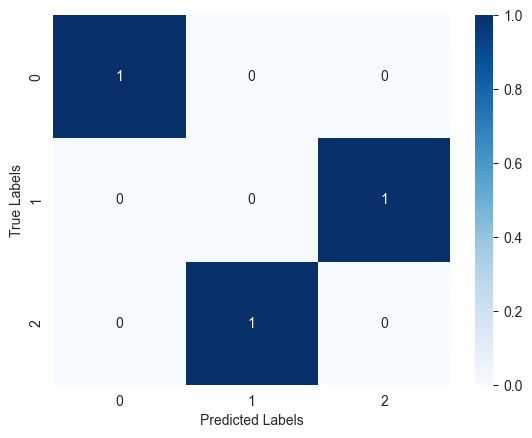

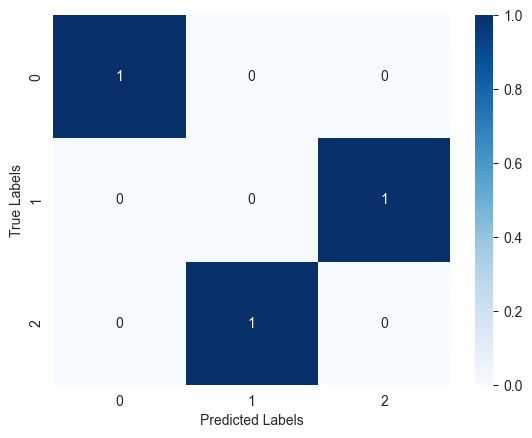

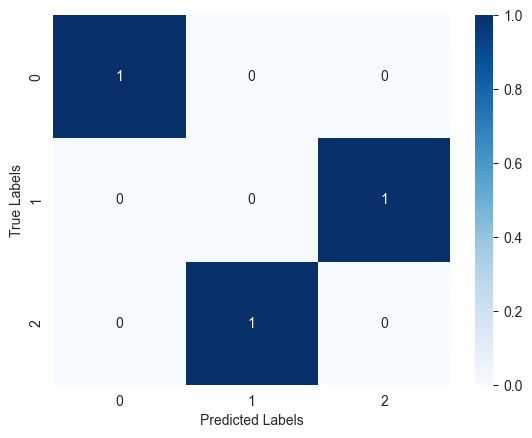

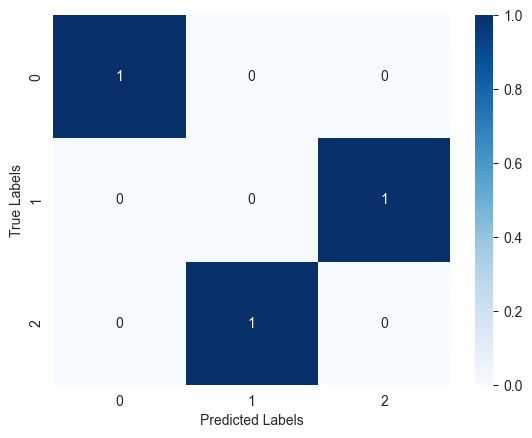

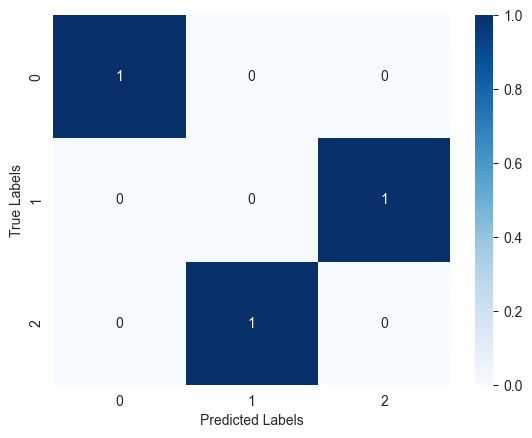

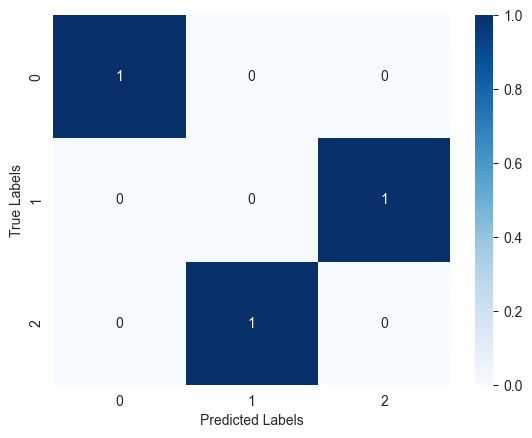

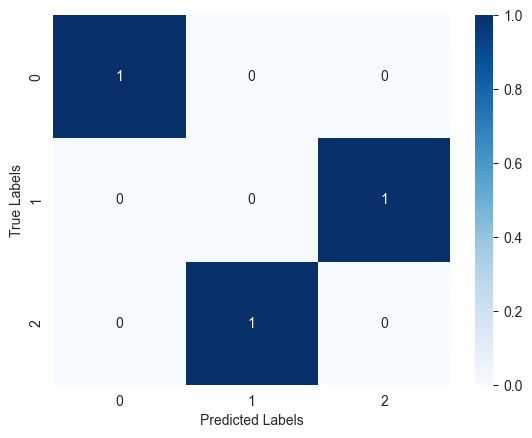

In [206]:
# Print the results
for name, result in results.items():
    print(f'{name}:')
    print('----------------------------------')
    print(f'F1 score: {result["F1 score"]}')
    print(f'Recall: {result["Recall"]}')
    print(f'Precision: {result["Precision"]}')
    print(f'Accuracy: {result["Accuracy"]}\n')

    # Plot the confusion matrix using seaborn
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator


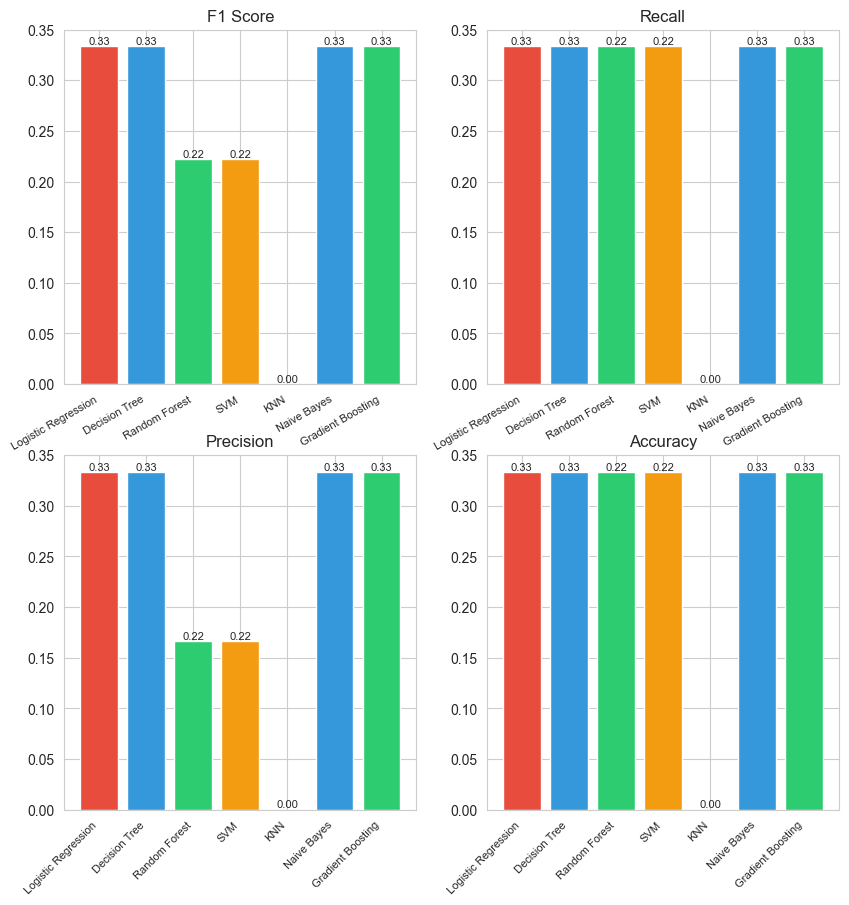

In [244]:
# Plot the results
f1_scores = [result['F1 score'] for result in results.values()]
recalls = [result['Recall'] for result in results.values()]
precisions = [result['Precision'] for result in results.values()]
accuracies = [result['Accuracy'] for result in results.values()]

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].bar(models.keys(), f1_scores, color=colors)
axs[0, 0].set_title('F1 Score')
axs[0, 1].bar(models.keys(), recalls, color=colors)
axs[0, 1].set_title('Recall')
axs[1, 0].bar(models.keys(), precisions, color=colors)
axs[1, 0].set_title('Precision')
axs[1, 1].bar(models.keys(), accuracies, color=colors)
axs[1, 1].set_title('Accuracy')

# Set x-axis tick labels vertical for the first row of subplots
for ax in axs[0]:
    ax.tick_params(axis='x', labelrotation=30, labelsize=8)
    ax.set_xticklabels(models.keys(), ha='right')
    for i, bar in enumerate(ax.containers):
        ax.bar_label(bar, labels=[f'{score:.2f}' for score in f1_scores], label_type='edge', fontsize=8)

for ax in axs[1]:
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.set_xticklabels(models.keys(), ha='right')
    for i, bar in enumerate(ax.containers):
        ax.bar_label(bar, labels=[f'{score:.2f}' for score in f1_scores], label_type='edge', fontsize=8)

# Set a margin for the second row of subplots
plt.subplots_adjust(bottom=0.1)

plt.show()


## 6. Model Selection and Training

In [247]:
lr = LogisticRegression()

lr.fit(x, y_data)

# Save the model to a file
with open('harvest_classifier.pkl', 'wb') as f:
    pickle.dump(lr, f)

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 7. Inference

In [313]:
def get_harvest_prediction(data, classifier='harvest_classifier.pkl', ordinal_encoder_obj='harvest_data_ordinal_encoded.pkl', onehot_encoder_obj='harvest_data_one_hot_encoded.pkl', scaler_obj='harvest_data_scaler.pkl', y_encoder_obj='y_data_ordinal_encoded.pkl', verbose=False):
    """
    This function predicts the harvest of a banana crop based on the given input data.
    It loads the pre-trained model, encoders, and scaler using pickle and applies them on the input data to get the predictions.

    Args:
        data (dict): A dictionary containing the input data for the prediction. It must include the following keys:
            - 'Variety': The variety of the banana crop. (str)
            - 'Agro-climatic region': The agro-climatic region where the banana crop is grown. (str)
            - 'Plant density': The plant density of the banana crop. (int)
            - 'Spacing between plants (m)': The spacing between plants in meters. (float)
            - 'Plant generation': The generation of the banana crop. (int)
            - 'Fertilizer type': The type of fertilizer used for the banana crop. (str)
            - 'Soil pH': The pH value of the soil. (float)
            - 'Amount of sunlight received': The amount of sunlight received by the banana crop. (str)
            - 'Watering schedule': The watering schedule for the banana crop. (str)
            - 'Number of days for flower initiation': The number of days for flower initiation. (int)
            - 'Number of leaves': The number of leaves on the banana crop. (int)
            - 'Number of banana combs': The number of banana combs. (int)
            - 'Number of bananas in one comb': The number of bananas in one comb. (int)
            - 'Height (m)': The height of the banana crop in meters. (float)
        classifier (str): The file path of the trained classifier object. Defaults to 'harvest_classifier.pkl'.
        ordinal_encoder_obj (str): The file path of the ordinal encoder object for 'Amount of sunlight received' and 'Watering schedule' columns. Defaults to 'harvest_data_ordinal_encoded.pkl'.
        onehot_encoder_obj (str): The file path of the one-hot encoder object for 'Variety', 'Agro-climatic region', and 'Fertilizer type' columns. Defaults to 'harvest_data_one_hot_encoded.pkl'.
        scaler_obj (str): The file path of the scaler object for scaling the encoded data. Defaults to 'harvest_data_scaler.pkl'.
        y_encoder_obj (str): The file path of the ordinal encoder object for the target variable 'Harvest'. Defaults to 'y_data_ordinal_encoded.pkl'.
        verbose (bool): Whether to print the predicted probabilities with encoded values. Defaults to False.

    Returns:
        tuple: A tuple containing two elements:
            - The predicted harvest in kilograms (str).
            - A dictionary containing the predicted probabilities for each harvest range. The keys are the harvest ranges and the values are the probabilities.

    Raises:
        KeyError: If the input data dictionary is missing one or more required keys.
        TypeError: If one or more input values have an invalid data type.
        ValueError: If the input values have an invalid value range.

    """

    # Validate input data
    required_keys = [
        'Variety', 'Agro-climatic region', 'Plant density', 'Spacing between plants (m)', 'Plant generation',
        'Fertilizer type', 'Soil pH', 'Amount of sunlight received', 'Watering schedule',
        'Number of days for flower initiation', 'Number of leaves', 'Number of banana combs',
        'Number of bananas in one comb', 'Height (m)'
    ]
    for key in required_keys:
        if key not in data:
            raise KeyError(f"Input data is missing '{key}' key.")

    # Load the model from file
    try:
        with open(classifier, 'rb') as f:
            harvest_classifier = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The trained model object `{classifier}` is not found.')

    # Load the encoder objects using pickle
    try:
        with open(ordinal_encoder_obj, 'rb') as f:
            oe = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The ordinal encoder objects `{ordinal_encoder_obj}`are not found.')
    try:
        with open(onehot_encoder_obj, 'rb') as f:
            ohe = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The onehot encoder objects `{onehot_encoder_obj}` are not found.')

    # Ordinal Encode categorical columns
    oe_cols = ['Amount of sunlight received', 'Watering schedule']
    # One-hot Encode categorical columns
    ohe_cols = ['Variety', 'Agro-climatic region', 'Fertilizer type']

    # data to dataframe
    data = pd.DataFrame.from_dict([data])

     # Ordinal encode data
    try:
        oe_data = oe.transform(data[oe_cols])
    except ValueError:
        raise ValueError('The values of "Amount of sunlight received" and/or "Watering schedule" are not valid.')

   # One-hot encode data
    try:
        ohe_data = ohe.transform(data[ohe_cols])
    except ValueError:
        raise ValueError('The values of "Variety", "Agro-climatic region", and/or "Fertilizer type" are not valid.')

    # combine encoded data
    encoded_data = np.hstack([ohe_data, oe_data])

     # Load the scaler objects using pickle
    try:
        with open(scaler_obj, 'rb') as f:
            scaler = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The scaler object `{scaler_obj}` is not found')

    try:
        normalized_data = scaler.transform(encoded_data)
    except ValueError as e:
        print(f"Error occurred while normalizing data: {e}")

    # get predictions
    pred_proba = harvest_classifier.predict_proba(normalized_data)
    pred = harvest_classifier.predict(normalized_data)

    # Load the encoder objects using pickle
    try:
        with open(y_encoder_obj, 'rb') as f:
            y_oe= pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The target variable ordinal encoder {y_encoder_obj} oject is not found')


    pred = y_oe.inverse_transform(pred.reshape(-1, 1)).flatten()
    labels = y_oe.inverse_transform(harvest_classifier.classes_.reshape(-1, 1)).flatten()

    # create predictions and probabilities dict
    pred_proba =  {label: probability for label, probability in zip(labels, pred_proba[0])}

    if verbose:
        # Print the predicted probabilities with encoded values
        print('Probabilities for each class: ')
        for i in pred_proba:
            print(f'\t{i}: {pred_proba[i]}')

    return pred[0], pred_proba

Probabilities for each class: 
	35-39 kg: 0.01857527107168932
	40-44 kg: 0.10758025003005307
	45-49 kg: 0.11587440917887108
	50-54 kg: 0.5271951567363049
	55-59 kg: 0.1978532094831727
	60-64 kg: 0.032921703499908965


('50-54 kg',
 {'35-39 kg': 0.01857527107168932,
  '40-44 kg': 0.10758025003005307,
  '45-49 kg': 0.11587440917887108,
  '50-54 kg': 0.5271951567363049,
  '55-59 kg': 0.1978532094831727,
  '60-64 kg': 0.032921703499908965})

In [314]:
sample_data = {
    "Variety": "Williams",
    "Agro-climatic region": "Intermediate Zone",
    "Plant density": 3,
    "Spacing between plants (m)": 1.5,
    "Plant generation": 3,
    "Fertilizer type": "Chemical",
    "Soil pH": 6.8,
    "Amount of sunlight received": "High",
    "Watering schedule": "Daily",
    "Number of days for flower initiation": 300,
    "Number of leaves": 12,
    "Number of banana combs": 4,
    "Number of bananas in one comb": 120,
    "Height (m)": 2.0
}

get_harvest_prediction(data=sample_data, verbose=True)

Probabilities for each class: 
	35-39 kg: 0.01857527107168932
	40-44 kg: 0.10758025003005307
	45-49 kg: 0.11587440917887108
	50-54 kg: 0.5271951567363049
	55-59 kg: 0.1978532094831727
	60-64 kg: 0.032921703499908965


('50-54 kg',
 {'35-39 kg': 0.01857527107168932,
  '40-44 kg': 0.10758025003005307,
  '45-49 kg': 0.11587440917887108,
  '50-54 kg': 0.5271951567363049,
  '55-59 kg': 0.1978532094831727,
  '60-64 kg': 0.032921703499908965})